In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function, division
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from scipy.stats import kendalltau

sns.set(style="ticks")

In [3]:
y_train = np.load("clens_training_labels.npy")
y_train = 1.0 - y_train # make star = 0 and galaxy = 1

In [4]:
y_test = np.load("clens_test_labels.npy")
y_test = 1.0 - y_test # make star = 0 and galaxy = 1

In [5]:
y_all = np.append(y_train, y_test)

In [6]:
df_train = pd.read_csv("clens_training.csv")
df_test = pd.read_csv("clens_test.csv")
df = df_train.append(df_test)

u_g = df["MAG_u"].values - df["MAG_g"].values
g_r = df["MAG_g"].values - df["MAG_r"].values
r_i = df["MAG_r"].values - df["MAG_i"].values
i_z = df["MAG_i"].values - df["MAG_z"].values

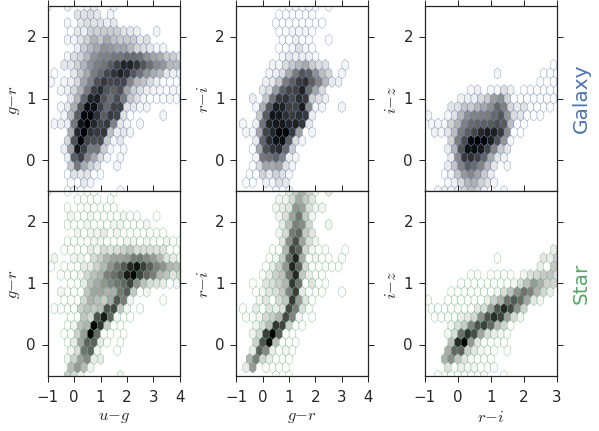

In [7]:
sns.set(style='ticks', font_scale=1.5)
#sns.despine(trim=True, offset=5)

p = sns.color_palette()

fig = plt.figure(figsize=(8, 8))

ax0 = plt.subplot2grid((3, 3), (0, 0))
ax1 = plt.subplot2grid((3, 3), (1, 0), sharex=ax0)
ax2 = plt.subplot2grid((3, 3), (0, 1))
ax3 = plt.subplot2grid((3, 3), (1, 1), sharex=ax2)
ax4 = plt.subplot2grid((3, 3), (0, 2))
ax5 = plt.subplot2grid((3, 3), (1, 2), sharex=ax4)

ax0.hexbin(
    u_g, g_r,
    C=y_all,
    reduce_C_function=np.sum,
    bins='log',
    extent=[-1.0, 4.0, -0.5, 2.5],
    gridsize=20,
    color=p[0]
)
ax0.set_ylabel("$g-r$")
ax0.set_yticks([0, 1, 2])

ax1.hexbin(
    u_g, g_r,
    C=1-y_all,
    reduce_C_function=np.sum,
    bins='log',
    extent=[-1.0, 4.0, -0.5, 2.5],
    gridsize=20,
    color=p[1]
)
ax1.set_xlabel("$u-g$")
ax1.set_ylabel("$g-r$")
ax1.set_xticks([-1, 0, 1, 2, 3, 4])
ax1.set_yticks([0, 1, 2])

ax2.hexbin(
    g_r, r_i,
    C=y_all,
    reduce_C_function=np.sum,
    bins='log',
    extent=[-1.0, 4.0, -0.5, 2.5],
    gridsize=20,
    color=p[0]
)
ax2.set_ylabel("$r-i$")
ax2.set_yticks([0, 1, 2])

ax3.hexbin(
    g_r, r_i,
    C=1-y_all,
    reduce_C_function=np.sum,
    bins='log',
    extent=[-1.0, 4.0, -0.5, 2.5],
    gridsize=20,
    color=p[1]
)
ax3.set_xlabel("$g-r$")
ax3.set_ylabel("$r-i$")
ax3.set_xticks([-1, 0, 1, 2, 3, 4])
ax3.set_yticks([0, 1, 2])

ax4.hexbin(
    r_i, i_z, 
    C=y_all,
    reduce_C_function=np.sum,
    bins='log',
    extent=[-1, 3, -0.5, 2.5],
    gridsize=20,
    color=p[0]
)
ax4.set_ylabel("$i-z$")
ax4.set_yticks([0, 1, 2])

ax5.hexbin(
    r_i, i_z, 
    C=1-y_all,
    reduce_C_function=np.sum,
    bins='log',
    extent=[-1, 3, -0.5, 2.5],
    gridsize=20,
    color=p[1]
)
ax5.set_xlabel("$r-i$")
ax5.set_ylabel("$i-z$")
ax5.set_xticks([-1, 0, 1, 2, 3])
ax5.set_yticks([0, 1, 2])

for ax in [ax0, ax2, ax4]:
    plt.setp(ax.get_xticklabels(), visible=False)
    # The y-ticks will overlap with "hspace=0", so we'll hide the bottom tick
    #ax.set_yticks(ax.get_yticks()[1:])  
    

plt.tight_layout()

fig.subplots_adjust(hspace=0)

ax4.annotate('Galaxy', xy=(1, 0.5), xycoords='axes fraction', fontsize=20,
                xytext=(35, 0), textcoords='offset points',
                ha='right', va='center', rotation=90,
            color=p[0])

ax5.annotate('Star', xy=(1, 0.5), xycoords='axes fraction', fontsize=20,
                xytext=(35, 0), textcoords='offset points',
                ha='right', va='center', rotation=90,
            color=p[1])

plt.savefig('figures/clens_color_color.pdf', bbox_inches='tight')